# 당뇨병 수치


In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import seaborn as sns

### (1) 데이터 가져오기

In [8]:


diabetes = load_diabetes()

In [9]:
df_X = diabetes['data']
df_y = diabetes['target']

In [10]:
type(df_X)

numpy.ndarray

In [5]:
type(df_y)

numpy.ndarray

### (4) train 데이터와 test 데이터로 분리하기

In [11]:

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(353, 10)

### (5) 모델 준비하기

In [114]:

# def model(X, W, b):
#     predictions = X.dot(W) + b
#     return predictions

def model(X, W, b):
    predictions = 0
    cols = X.shape[1]
    for i in range(cols):
        predictions += X[:, i]* W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기

In [115]:
def MSE(a, b):
    mse = ((a - b)**2).mean()
    return mse

def loss(X, W, b, y):
    preds = model(X, W, b)
    mse = MSE(preds, y)
    return mse
    

### (7) 기울기를 구하는 gradient 함수 구현하기

In [116]:
def gradient(X, W, b, y):
    N = len(y)
    predictions = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(predictions - y)
    db = 2 * (predictions - y).mean()
    return dW, db
    
    

### (8) 하이퍼 파라미터인 학습률 설정하기

In [123]:
LEARNING_RATE = 0.001
# W, b, 초기화
col_n = X_train.shape[1]
W = np.random.rand(col_n)
b = np.random.rand()

### (9) 모델 학습하기

In [124]:
losses = []
for i in range(1, 50001):
    dW, db = gradient(X_train,W , b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print(f'Iteration {i} : Loss {L:0.1}')

Iteration 100 : Loss 2e+04
Iteration 200 : Loss 2e+04
Iteration 300 : Loss 1e+04
Iteration 400 : Loss 1e+04
Iteration 500 : Loss 9e+03
Iteration 600 : Loss 8e+03
Iteration 700 : Loss 7e+03
Iteration 800 : Loss 7e+03
Iteration 900 : Loss 7e+03
Iteration 1000 : Loss 6e+03
Iteration 1100 : Loss 6e+03
Iteration 1200 : Loss 6e+03
Iteration 1300 : Loss 6e+03
Iteration 1400 : Loss 6e+03
Iteration 1500 : Loss 6e+03
Iteration 1600 : Loss 6e+03
Iteration 1700 : Loss 6e+03
Iteration 1800 : Loss 6e+03
Iteration 1900 : Loss 6e+03
Iteration 2000 : Loss 6e+03
Iteration 2100 : Loss 6e+03
Iteration 2200 : Loss 6e+03
Iteration 2300 : Loss 6e+03
Iteration 2400 : Loss 6e+03
Iteration 2500 : Loss 6e+03
Iteration 2600 : Loss 6e+03
Iteration 2700 : Loss 6e+03
Iteration 2800 : Loss 6e+03
Iteration 2900 : Loss 6e+03
Iteration 3000 : Loss 6e+03
Iteration 3100 : Loss 6e+03
Iteration 3200 : Loss 6e+03
Iteration 3300 : Loss 6e+03
Iteration 3400 : Loss 6e+03
Iteration 3500 : Loss 6e+03
Iteration 3600 : Loss 6e+03
I

Iteration 29700 : Loss 5e+03
Iteration 29800 : Loss 5e+03
Iteration 29900 : Loss 5e+03
Iteration 30000 : Loss 5e+03
Iteration 30100 : Loss 5e+03
Iteration 30200 : Loss 4e+03
Iteration 30300 : Loss 4e+03
Iteration 30400 : Loss 4e+03
Iteration 30500 : Loss 4e+03
Iteration 30600 : Loss 4e+03
Iteration 30700 : Loss 4e+03
Iteration 30800 : Loss 4e+03
Iteration 30900 : Loss 4e+03
Iteration 31000 : Loss 4e+03
Iteration 31100 : Loss 4e+03
Iteration 31200 : Loss 4e+03
Iteration 31300 : Loss 4e+03
Iteration 31400 : Loss 4e+03
Iteration 31500 : Loss 4e+03
Iteration 31600 : Loss 4e+03
Iteration 31700 : Loss 4e+03
Iteration 31800 : Loss 4e+03
Iteration 31900 : Loss 4e+03
Iteration 32000 : Loss 4e+03
Iteration 32100 : Loss 4e+03
Iteration 32200 : Loss 4e+03
Iteration 32300 : Loss 4e+03
Iteration 32400 : Loss 4e+03
Iteration 32500 : Loss 4e+03
Iteration 32600 : Loss 4e+03
Iteration 32700 : Loss 4e+03
Iteration 32800 : Loss 4e+03
Iteration 32900 : Loss 4e+03
Iteration 33000 : Loss 4e+03
Iteration 3310

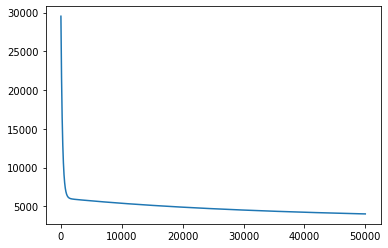

In [125]:

plt.plot(losses)
plt.show()

### (10) test 데이터에 대한 성능 확인하기

In [126]:
## 테스트 성능 확인
test_preds = model(X_test, W, b)
mse = MSE(test_preds, y_test)
mse

3503.1161087091727

### (11) 정답 데이터와 예측한 데이터 시각화하기

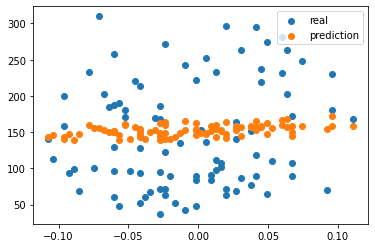

In [27]:
plt.scatter(X_test[:, 0], y_test, label='real')
plt.scatter(X_test[:, 0], test_preds, label='prediction')
plt.legend()
plt.show()


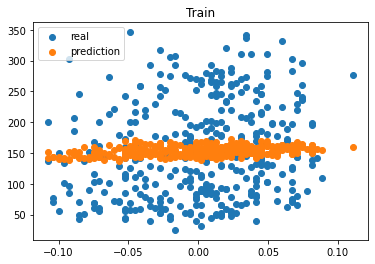

In [28]:
train_preds = model(X_train, W, b)

plt.scatter(X_train[:, 0], y_train, label='real')
plt.scatter(X_train[:, 0], train_preds, label='prediction')
plt.legend()
plt.title('Train')
plt.show()


### 성능 향상


In [46]:
X_train.shape

(353, 10)

In [47]:
total = np.hstack((y_train.reshape(-1, 1), X_train))
total.shape

(353, 11)

In [71]:
total_df = pd.DataFrame(total)
total_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,144.0,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027368,-0.001078
1,150.0,-0.009147,0.050680,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633
2,280.0,0.005383,-0.044642,0.049840,0.097616,-0.015328,-0.016345,-0.006584,-0.002592,0.017037,-0.013504
3,125.0,-0.027310,-0.044642,-0.035307,-0.029771,-0.056607,-0.058620,0.030232,-0.039493,-0.049868,-0.129483
4,59.0,-0.023677,-0.044642,-0.065486,-0.081414,-0.038720,-0.053610,0.059685,-0.076395,-0.037128,-0.042499


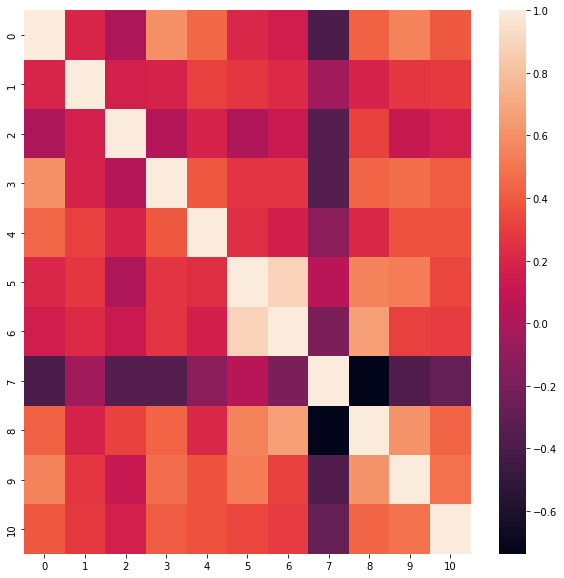

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(total_df.corr())
plt.show()

In [134]:
total_corr = total_df.corr()
total_corr

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.196510,0.007116,0.604751,0.444774,0.199547,0.154922,-0.384000,0.425094,0.552183,0.390363
1,0.196510,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268426,0.281806
2,0.007116,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113189,0.165951
3,0.604751,0.184695,0.033934,1.000000,0.394313,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
4,0.444774,0.314569,0.179283,0.394313,1.000000,0.239986,0.161468,-0.120826,0.212790,0.375297,0.374646
5,0.199547,0.270283,0.021069,0.266467,0.239986,1.000000,0.891063,0.053003,0.546840,0.528539,0.330773
6,0.154922,0.218952,0.120205,0.261560,0.161468,0.891063,1.000000,-0.190658,0.654675,0.307134,0.293291
7,-0.384000,-0.043783,-0.355094,-0.354655,-0.120826,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
8,0.425094,0.180038,0.320490,0.430974,0.212790,0.546840,0.654675,-0.736685,1.000000,0.613471,0.431352
9,0.552183,0.268426,0.113189,0.468473,0.375297,0.528539,0.307134,-0.372437,0.613471,1.000000,0.478967


In [127]:
corr_criteria = 0.2

sel_index = total_corr.columns[1:][abs(total_corr.loc[0, 1:])>corr_criteria]
sel_index

Int64Index([3, 4, 7, 8, 9, 10], dtype='int64')

In [128]:
sel_cols = [i-1 for i in list(sel_index)]
sel_cols

[2, 3, 6, 7, 8, 9]

In [129]:
X_train_sel = X_train[:, sel_cols]
X_train_sel.shape

(353, 6)

In [135]:
# 모델링
LEARNING_RATE = 0.001
col_n = X_train_sel.shape[1]
W = np.random.rand(col_n)
b = np.random.rand()

losses = []
for i in range(1, 150001):
    dW, db = gradient(X_train_sel, W , b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train_sel, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print(f'Iteration {i} : Loss {L:0.1}')

Iteration 10000 : Loss 5e+03
Iteration 20000 : Loss 5e+03
Iteration 30000 : Loss 5e+03
Iteration 40000 : Loss 4e+03
Iteration 50000 : Loss 4e+03
Iteration 60000 : Loss 4e+03
Iteration 70000 : Loss 4e+03
Iteration 80000 : Loss 4e+03
Iteration 90000 : Loss 4e+03
Iteration 100000 : Loss 3e+03
Iteration 110000 : Loss 3e+03
Iteration 120000 : Loss 3e+03
Iteration 130000 : Loss 3e+03
Iteration 140000 : Loss 3e+03
Iteration 150000 : Loss 3e+03


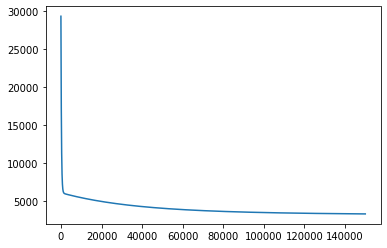

In [136]:

plt.plot(losses)
plt.show()

In [137]:
X_test_sel = X_test[:, sel_cols]

test_preds = model(X_test_sel, W, b)
mse = MSE(test_preds, y_test)
mse

2970.3808273690493

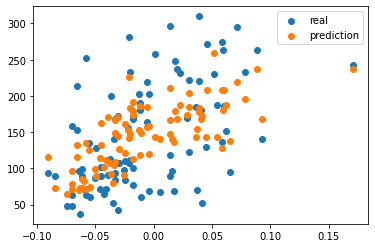

In [138]:
plt.scatter(X_test_sel[:, 0], y_test, label='real')
plt.scatter(X_test_sel[:, 0], test_preds, label='prediction')
plt.legend()
plt.show()